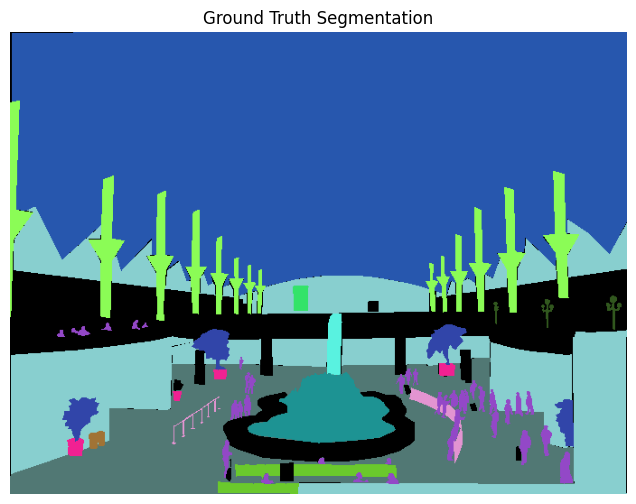

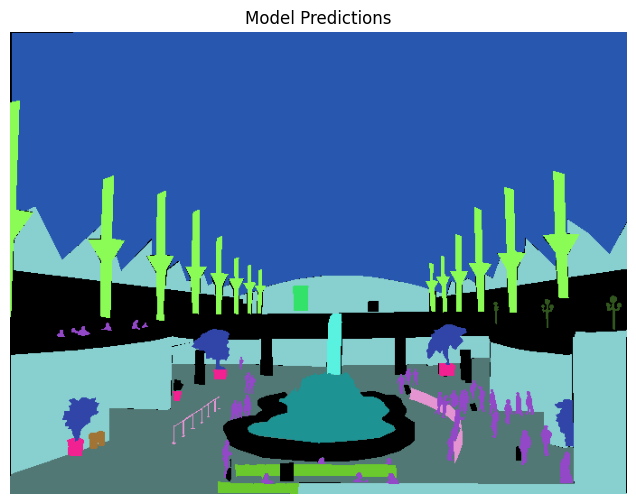

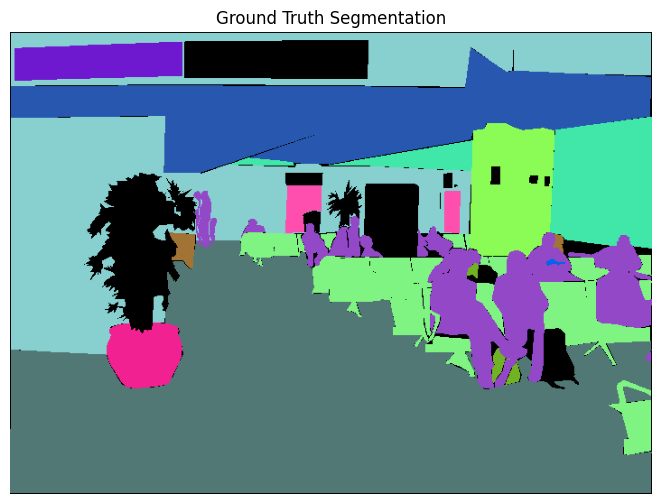

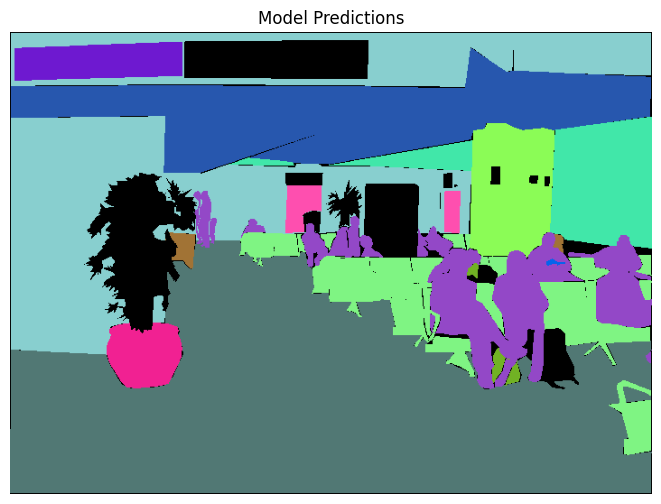

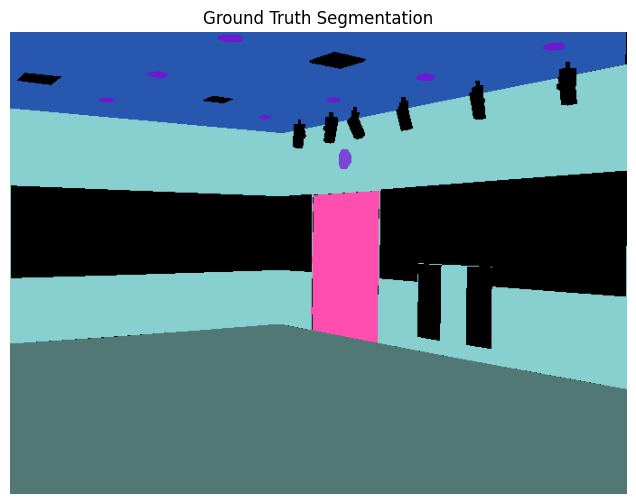

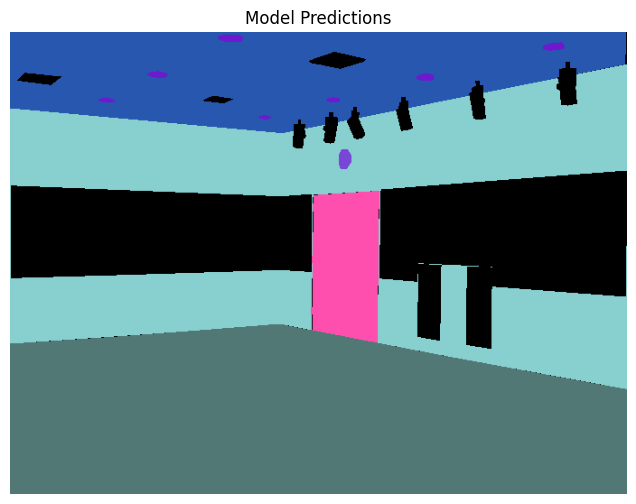

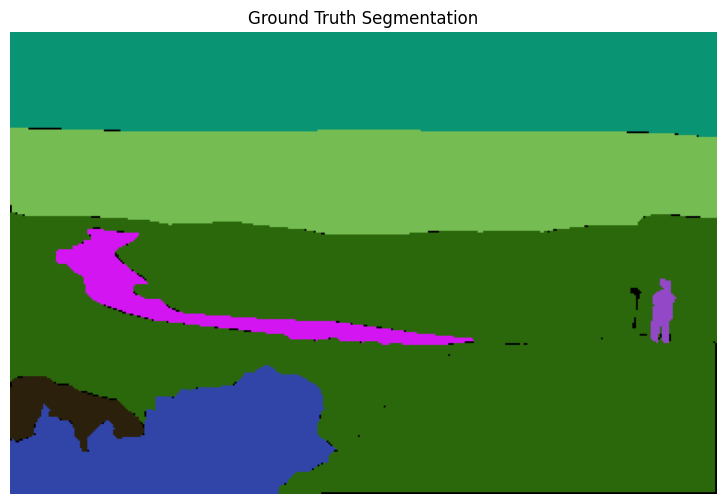

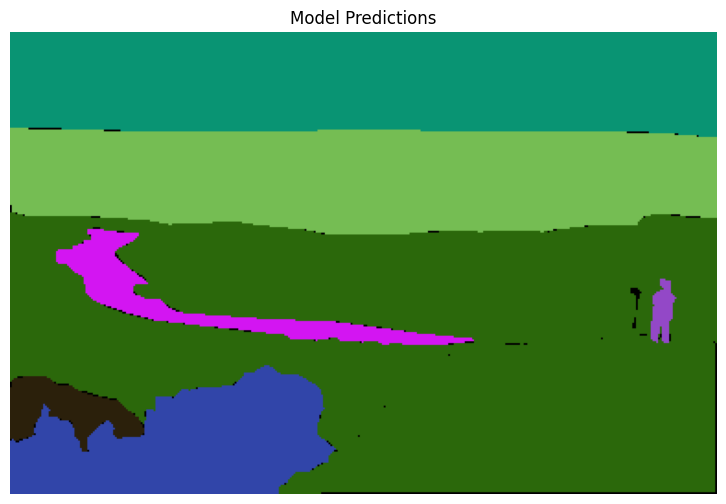

In [20]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors 
 
def generate_color_map(num_classes): 
    """ 
    Generate a color map for visualizing segmentation masks. 
    Args: 
        num_classes: Total number of classes. 
    Returns: 
        color_map: A dictionary mapping class indices to RGB tuples. 
    """ 
    color_map = {} 
    np.random.seed(0)  # Set seed for reproducibility 
    for i in range(num_classes - 1):  # Generate colors for classes 0 to 193 
        color_map[i] = np.random.randint(0, 255, size=3) 
    color_map[num_classes - 1] = np.array([0, 0, 0])  # Black for the final class (194) 
    return color_map 
 
def apply_color_map(label_tensor, color_map): 
    """ 
    Map a label tensor to an RGB image using the provided color map. 
    Args: 
        label_tensor: A torch tensor of shape [H, W] containing class labels. 
        color_map: A dictionary mapping class indices to RGB tuples. 
    Returns: 
        rgb_image: An RGB image of shape [H, W, 3]. 
    """ 
    label_array = label_tensor.numpy()  # Convert tensor to numpy 
    h, w = label_array.shape 
    rgb_image = np.zeros((h, w, 3), dtype=np.uint8) 
    for class_idx, color in color_map.items(): 
        rgb_image[label_array == class_idx] = color 
    return rgb_image 
 
def visualize_predictions(predictions, color_map, title="Model Predictions"): 
    """ 
    Visualize model predictions with a color map. 
    Args: 
        predictions: A torch tensor of shape [H, W]. 
        color_map: A dictionary mapping class indices to RGB tuples. 
        title: Title of the plot. 
    """ 
    # Apply color map to the predictions 
    rgb_image = apply_color_map(predictions, color_map) 
 
    # Plot the RGB image 
    plt.figure(figsize=(10, 6)) 
    plt.imshow(rgb_image) 
    plt.title(title) 
    plt.axis("off") 
    plt.show() 
 
# Define number of classes 
num_classes = 195 
batch_size =  4
# Generate a color map for 195 classes 
color_map = generate_color_map(num_classes) 
 
# Example: Visualize predictions 
for i in range(batch_size):
    # Fetch a dataset sample 
    X, y = dataset[i]  # predictions from model
     
    # Visualize the ground truth label (y) using the color map 
    visualize_predictions(y, color_map, title="Ground Truth Segmentation") 
     
    # Simulate predictions (for testing purposes, here we use `y` as mock predictions) 
    predictions = y  # Replace with actual model predictions in practice 
     
    # Visualize the predictions 
    visualize_predictions(predictions, color_map, title="Model Predictions") 
     

 